# Data Integration and Reshaping
Due Date: 02/06/2020

Version: 1

Environment: Python 2.7.11 and Jupyter notebook

Libraries used:
* pandas (loading data, create dataframes and manipulate a dataframe and plotting)
* BeautifulSoup (for parse XML file)
* numpy (filling missing values with Zero)
* seaborn (statistical data visualization for drawing attractive statistical graphics)
* matplotlib (drawing graphics such as histogram and scatter etc)
* pylab (a magic function in ipython, used to draw Q-Q plot)
* scipy.stats (To create a distribution, generate random variates and calculate the pdf)
* sklearn.preprocessing (functionTransformer, used for normalization data)
* math (calculate logarithmic function in mathmatical)
* matplotlib.cm (matplotlib's colormaps to map this number to a color)
* Basemap (Module for plotting data on maps with matplotlib)

# Introduction

This assessment is about data integration and reshaping. It focuses on integrating data that collected from 2 sources: one is stored in csv format and another is in xml format. After resolving different levels of conflicts, those data has been mergered as an integrated dataset. After that, numeric vairables has been applied with z-score normalization, Min-Max normalization and log transformation. By comparing and analyzing how they they affect the distribution of the data, the best solution has been add to dataframe. And the output is eventually stored in a new csv file. 

## This Task has 5 main steps:
1. Loading data
2. Resolve schema conflicts 
3. Checking similarity
4. Merge dataframes
5. Data normalization and transformation
6. Writing into a csv file
7. Visualizing property data based on price on the map



***

## Import libraries 

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
from sklearn import preprocessing
import math
import matplotlib.cm
from mpl_toolkits.basemap import Basemap

In [2]:
!python --version

Python 2.7.13 :: Anaconda 4.4.0 (64-bit)


***

# Task begins:

## Step1: Loading data into dataframe

#### 1. Loading csv file, I also call it S1 in the following

In [3]:
#read by using pandas
df_csv = pd.read_csv('data_s1_ass3.csv') 
type(df_csv)

pandas.core.frame.DataFrame

In [4]:
#show the first 5 rows
df_csv.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,20140502T000000,313k,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,20140502T000000,2.384m,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,20140502T000000,342k,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,20140502T000000,420k,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,20140502T000000,550k,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


#### 2. Loading xml file, I also call it S2 in the following

In [5]:
#parse xml file by using beauifulsoup
soup=BeautifulSoup(open("data_s2_ass3.xml"),"lxml-xml") 

In [6]:
#see the content structure
print(soup.prettify())

<?xml version="1.0" encoding="utf-8"?>
<records>
 <record>
  <date>
   2014-07-19
  </date>
  <address>
   10515, 115th Place Northeast, Juanita, Kirkland, King County, Washington, 98033, United States of America
  </address>
  <price>
   630000
  </price>
  <soldDate>
   2014-07-09
  </soldDate>
  <bedrooms>
   3
  </bedrooms>
  <bathrooms>
   1.75
  </bathrooms>
  <livingArea unit="sqm">
   158.8641984
  </livingArea>
  <lotArea unit="sqm">
   814.48095168
  </lotArea>
  <floors>
   1.0
  </floors>
  <waterfront/>
  <view/>
  <upperArea unit="sqm">
   158.8641984
  </upperArea>
  <basementArea/>
  <buildYear>
   1986
  </buildYear>
  <renovateYear>
   0
  </renovateYear>
 </record>
 <record>
  <date>
   2014-07-10
  </date>
  <address>
   1501, Northwest 90th Street, Ballard, Seattle, King County, Washington, 98117, United States of America
  </address>
  <price>
   599950
  </price>
  <soldDate>
   2014-07-09
  </soldDate>
  <bedrooms>
   3
  </bedrooms>
  <bathrooms>
   3.25
  </ba

In [7]:
#extract all of attributes using find_all method
date = [date.string for date in soup.find_all("date")]
address = [address.string for address in soup.find_all("address")]
price = [price.string for price in soup.find_all("price")]
soldDate = [soldDate.string for soldDate in soup.find_all("soldDate")]
bedrooms=[bedrooms.string for bedrooms in soup.find_all("bedrooms")]
bathrooms=[bathrooms.string for bathrooms in soup.find_all("bathrooms")]
livingArea=[livingArea.string for livingArea in soup.find_all("livingArea")]
lotArea=[lotArea.string for lotArea in soup.find_all("lotArea")]
floors=[floors.string for floors in soup.find_all("floors")]
waterfront=[waterfront.string for waterfront in soup.find_all("waterfront")]
view=[view.string for view in soup.find_all("view")]
upperArea=[upperArea.string for upperArea in soup.find_all("upperArea")]
basementArea=[basementArea.string for basementArea in soup.find_all("basementArea")]
buildYear=[buildYear.string for buildYear in soup.find_all("buildYear")]
renovateYear=[renovateYear.string for renovateYear in soup.find_all("renovateYear")]

After the extraction, we can put all the information into a Pandas DataFrame.

### Fixing S2 Structure Name Conflicts
Before we write above values into a dataframe, we need to solve name conflict with csv file first. 

Because the name headings of xml file is different from csv file, I rename column names in xml file to match with csv file.

In [8]:
#check all of column names in csv file
df_csv.columns

Index([u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'street', u'city', u'statezip', u'country'],
      dtype='object')

##### Writing xml file into dataframe
Here, I put all of values extracted by beautiful soup into a dataframe, and let column names and order of names correspond to S1

In [9]:
#build a dictionary first
dataDict = {}
#let all values correspond to keys
dataDict['recorddate'] = date
dataDict['date'] = soldDate
dataDict['price'] = price
dataDict['bedrooms'] = bedrooms
dataDict['bathrooms'] = bathrooms
dataDict['sqft_living'] = livingArea
dataDict['sqft_lot'] = lotArea
dataDict['floors'] = floors
dataDict['waterfront'] = waterfront
dataDict['view'] = view
dataDict['sqft_above'] = upperArea
dataDict['sqft_basement'] = basementArea
dataDict['yr_built'] = buildYear
dataDict['yr_renovated'] = renovateYear
dataDict['address'] = address
#write dictionary into a dataframe
df_xml= pd.DataFrame(dataDict)
#change the order of dataframe column to match S1
df_xml= df_xml[['recorddate', 'date', 'price', 'bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront',
                'view','sqft_above','sqft_basement','yr_built','yr_renovated','address']]
#check the first 5 rows
df_xml.head()

,recorddate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,address
0,2014-07-19,2014-07-09,630000,3,1.75,158.8641984,814.48095168,1.0,None,None,158.8641984,None,1986,0,"10515, 115th Place Northeast, Juanita, Kirklan..."
1,2014-07-10,2014-07-09,599950,3,3.25,170.0125632,167.59708416,3.0,None,None,170.0125632,None,2014,0,"1501, Northwest 90th Street, Ballard, Seattle,..."
2,2014-07-16,2014-07-09,680000,3,2.0,165.3674112,531.4053888,1.0,None,None,91.0449792,74.322432,1925,0,"537, North 70th Street, Phinney Ridge, Seattle..."
3,2014-07-13,2014-07-09,335500,3,1.0,127.2771648,629.8826112,2.0,None,None,127.2771648,None,1930,0,"12008, 35th Avenue Northeast, Cedar Park, Lake..."
4,2014-07-18,2014-07-09,379000,3,2.5,142.1416512,270.62655552,2.0,None,None,142.1416512,None,1986,0,"11807, Northeast 105th Court, Juanita, Kirklan..."


***

# Step 2: Schema Conflicts

- Inspect S1 and S2 schema to find any schema conflicts which include structure conflicts, naming conflicts(already solved below), data conflicts and entity resolution conflicts.

In this Step, there is 4 main methods to solve the problem:
1. Detect & Fix S1 datatype
2. Detect & Fix S2 datatype
3. Fix entity conflicts
4. Check Similarity between 2 dataframes after resolving all of conflicts

### Detecting & Fixing structure conflicts in S1 & S2

#### Checking the Structure of S1 & S2 

In [10]:
print 'Data type for S1 is:'
df_csv.dtypes

Data type for S1 is:


date              object
price             object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [11]:
print 'Data type for S2 is:'
df_xml.dtypes

Data type for S2 is:


recorddate       object
date             object
price            object
bedrooms         object
bathrooms        object
sqft_living      object
sqft_lot         object
floors           object
waterfront       object
view             object
sqft_above       object
sqft_basement    object
yr_built         object
yr_renovated     object
address          object
dtype: object

#### Structure Conflict Findings

In the above section after getting the datatypes of both datasets I have noticed the following:
##### Conflicts in S1
- In S1 datatype of price is coming as object, it shoule change to integer type
- In S1 there is no column for record_date but is available in S2.

##### Conflicts in S2
- In S2 datatype of date shoule be the same date type as S1
- Some numeric variables datatype should be changed to numbers, such as price, bedrooms, sqft_living etc.
- In S2 there is no column for condition but is available in S1.
- In S2 the column of address has not been splitted while in S1 the address is split by street, city, statezip and country.


### 2.1. Fixing S1 datatype Conflicts

##### For attribute of price: writing data into decimal format: converting 'k' to '000', convert 'm' to '000000'
In order to fix price datatype, we have to change price to correct unit

In [12]:
#using regular expression to replace k and m to thousands and millions respectively
df_csv.price = (df_csv.price.replace(r'[km]+$', '', regex=True).astype(float) * \
                df_csv.price.str.extract(r'[\d\.]+([km]+)', expand=False)          
                .replace(['k','m'], [10**3, 10**6]).astype(int))                   
#change float type to integer
df_csv['price']=df_csv[['price']].astype(int)

In [13]:
df_csv.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,20140502T000000,313000,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,20140502T000000,2384000,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA
2,20140502T000000,342000,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,20140502T000000,420000,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA
4,20140502T000000,550000,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA


## 2.2 Fixing the datatypes in S2 to match with S1

* Changing date format
* Changing recorddate format
* Changing other datatypes format such as date, price, bedrooms, bathrooms,  floors, condition, yr_built, yr_renovated in S2 to match dataypes with S1. 
* Changing address conflict with S1. S2 has an entire address while S1 is splitted address into street, city, statezip and country


### 2.2.1 Changing date type
change date datatype to match S1 date

In [14]:
#change date datatype to match S1 date
df_xml['date']=df_xml.date.str.replace('-' , '')
df_xml['date']=df_xml['date']+str('T000000')

### 2.2.2 Changing recorddate type
Because S1 does not have recorddate, I just follow the original format in S2 and change recorddate to datetime format in case of the further usage.

In [15]:
#change recorddate to datetime format
df_xml['recorddate']= pd.to_datetime(df_xml['recorddate'])

### 2.2.3 Changing other datatypes

* spft_living, sqft_lot, sqft_above and sqft_basement are in float format, which are different from S1. The reason might be they use the different unit(I would check it in the next step), here, I just change them to float first. 
* Column view have null values, changing it to float. 

In [16]:
#change to correct type
df_xml['price']=df_xml[['price']].astype(int)
df_xml['bedrooms']=df_xml[['bedrooms']].astype(int)
df_xml['bathrooms']=df_xml[['bathrooms']].astype(float)
df_xml['sqft_living']=df_xml[['sqft_living']].astype(float)
df_xml['sqft_lot']=df_xml[['sqft_lot']].astype(float)
df_xml['floors']=df_xml[['floors']].astype(float)
df_xml['view']=df_xml[['view']].astype(float)
df_xml['sqft_above']=df_xml[['sqft_above']].astype(float)
df_xml['sqft_basement']=df_xml[['sqft_basement']].astype(float)
df_xml['yr_built']=df_xml[['yr_built']].astype(int)
df_xml['yr_renovated']=df_xml[['yr_renovated']].astype(int)

In [17]:
df_xml.dtypes

recorddate       datetime64[ns]
date                     object
price                     int32
bedrooms                  int32
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront               object
view                    float64
sqft_above              float64
sqft_basement           float64
yr_built                  int32
yr_renovated              int32
address                  object
dtype: object

### 2.2.4 Fixing address conflict
- Splitting address
- Change street name to abbreviation


#### 1. Spliting address column in S2 to fix structure conflict
Spliting address into street, city, statezip and country, and matching with S1.

Address should be splitted into street, city, statezip and country. I token them by commas. I noticed that some addresses have 5 tokens (matching s1 perfectly), some have 6 tokens, some have 7 tokens(does not have street number), some have 8 (normal address), some have 9 (have one more district name) and one have 10 (the property is in a fire station). Here is my code for splitting those addresses into different situations.

In [18]:
address_list=[]
#for every address
for each in df_xml.address:
    #split into a list
    temp_list=each.split(', ')
    #count total number of items in a list
    number_of_item=len(temp_list)
    new_list=[]
    #if number=9, then remove 1 district
    if number_of_item == 9:
        new_list=temp_list[0]+" "+temp_list[1]+", "+temp_list[4]+", "+temp_list[6]+" "+temp_list[7]+", "+temp_list[8]
        #print str(new_list)
        address_list.append(str(new_list))
    #if number=10, add 2 address together
    elif number_of_item ==10:
        new_list=temp_list[0]+" "+temp_list[1]+" "+temp_list[2]+", "+temp_list[5]+", "+temp_list[7]+" "+temp_list[8]+", "+temp_list[9]
        address_list.append(str(new_list))
    elif number_of_item == 7:
        new_list=temp_list[0]+" "+temp_list[1]+", "+temp_list[2]+", "+temp_list[4]+" "+temp_list[5]+", "+temp_list[6]
        address_list.append(str(new_list))
    elif number_of_item == 6:
        new_list=temp_list[0]+", "+temp_list[1]+", "+temp_list[3]+" "+temp_list[4]+", "+temp_list[5]
        address_list.append(str(new_list))
    #number=5 lack of statezip, I google and found its corresponding Washington statezip is 98025. So I just add it
    elif number_of_item == 5:
        new_list=temp_list[0]+", "+temp_list[1]+", "+temp_list[3]+" "+"98025"+", "+temp_list[4]
        address_list.append(str(new_list))
    else:
        new_list=temp_list[0]+" "+temp_list[1]+", "+temp_list[3]+", "+temp_list[5]+" "+temp_list[6]+", "+temp_list[7]
        address_list.append(str(new_list))
#address_list

Now, change original address to revised above address list

In [19]:
#change original address to revised address list
df_xml[['address']]=address_list

split address into street, city, statezip and country

In [20]:
#split address into 4 parts
df_xml['street'],df_xml['city'],df_xml['statezip'],df_xml['country'] = df_xml['address'].str.split(", ").str

remove original address column

In [21]:
#remove address column
df_xml.drop(['address'], axis=1, inplace = True)

Check the splitted address

In [22]:
df_xml.head()

,recorddate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-07-19,20140709T000000,630000,3,1.75,158.864198,814.480952,1.0,None,NaN,158.864198,NaN,1986,0,10515 115th Place Northeast,Kirkland,Washington 98033,United States of America
1,2014-07-10,20140709T000000,599950,3,3.25,170.012563,167.597084,3.0,None,NaN,170.012563,NaN,2014,0,1501 Northwest 90th Street,Seattle,Washington 98117,United States of America
2,2014-07-16,20140709T000000,680000,3,2.00,165.367411,531.405389,1.0,None,NaN,91.044979,74.322432,1925,0,537 North 70th Street,Seattle,Washington 98103,United States of America
3,2014-07-13,20140709T000000,335500,3,1.00,127.277165,629.882611,2.0,None,NaN,127.277165,NaN,1930,0,12008 35th Avenue Northeast,Seattle,Washington 98125,United States of America
4,2014-07-18,20140709T000000,379000,3,2.50,142.141651,270.626556,2.0,None,NaN,142.141651,NaN,1986,0,11807 Northeast 105th Court,Kirkland,Washington 98033,United States of America


#### 2. Turning address to abbreviation

Turning statezip and country string to abbreviation to match S1

In [23]:
#change 'Washington' to 'WA' in column of statezip
df_xml['statezip'] = df_xml['statezip'].str.replace('Washington','WA')

In [24]:
#change 'United States of America' to 'USA' in column of country
df_xml['country'] = df_xml['country'].str.replace('United States of America','USA')

Turning street surfix to abbreviation

In [25]:
#list all place fullname
fullname=['North','South','East','West','Northeast','Northwest','Southeast','Southwest',
          'Avenue','Street','Place','Court','Road','Drive','Lane','Boulevard']
#list all place abbreviation
abbrename=['N','S','E','W','NE','NW','SE','SW',
          'Ave','St','Pl','Ct','Rd','Dr','Ln','Blvd']
#change address name
street_list=[]
for street in df_xml.street:
    #split by space and turn string into list
    temp_li=street.split(' ')
    temp_street=[]
    for each in temp_li:
        if each in fullname:
            #replace abbrevation with full name
            each=abbrename[fullname.index(each)].strip()
            temp_street.append(each)
        else:
            temp_street.append(each)
    #turn list into string
    string=" ".join(temp_street)
    street_list.append(string)
#street_list

In [26]:
#change the value in street column
df_xml[['street']]=street_list

In [27]:
df_xml.head()

,recorddate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-07-19,20140709T000000,630000,3,1.75,158.864198,814.480952,1.0,None,NaN,158.864198,NaN,1986,0,10515 115th Pl NE,Kirkland,WA 98033,USA
1,2014-07-10,20140709T000000,599950,3,3.25,170.012563,167.597084,3.0,None,NaN,170.012563,NaN,2014,0,1501 NW 90th St,Seattle,WA 98117,USA
2,2014-07-16,20140709T000000,680000,3,2.00,165.367411,531.405389,1.0,None,NaN,91.044979,74.322432,1925,0,537 N 70th St,Seattle,WA 98103,USA
3,2014-07-13,20140709T000000,335500,3,1.00,127.277165,629.882611,2.0,None,NaN,127.277165,NaN,1930,0,12008 35th Ave NE,Seattle,WA 98125,USA
4,2014-07-18,20140709T000000,379000,3,2.50,142.141651,270.626556,2.0,None,NaN,142.141651,NaN,1986,0,11807 NE 105th Ct,Kirkland,WA 98033,USA


## 2.3 Detecting & fixing entity conflicts in S1 & S2
- Changing waterfront expression conflict
- Matching missing values
- Numeric variable Unit convention (square meter to square foot)

### 2.3.1 Changing S2 waterfront expression of 'yes' and None type to '1' and '0' in order to match S1
- The expression of column waterfront for S2 is different from S1. A house with a waterview corresponds to 'Yes' in S2 while in S1 the house with waterview corresponds to the number 1.  

Check waterfront of S1 and S2 

In [28]:
df_csv.waterfront.unique()

array([0, 1], dtype=int64)

In [29]:
df_xml.waterfront.unique()

array([None, u'Yes'], dtype=object)

Replacing all the NaN values with Zero's in a column of waterfront

In [30]:
df_xml['waterfront'].fillna(0, inplace=True)

Replacing 'Yes' in waterfront column with 1

In [31]:
df_xml['waterfront'] = df_xml['waterfront'].replace(['Yes'], 1)

Checking the column waterfront in S2 now

In [32]:
df_xml.waterfront.unique()

array([0, 1], dtype=int64)

### 2.3.2. Matching Missing values in S2 with S1

In this step, I will revise S2 missing values to match S1. Because in S1, just yr_renovated has missing values, others variables show as 0 instead of NAN. Now, I would like to fill S2 missing values in 0 and fill yr_renovated with NAN.

- Replacing NaN values with Zero's in a column of view
- Replacing NaN values with Zero's in a column of basement
- Replacing Zero's with NaN values in a column of yr_renovated



Checking missing values in S1 and S2

S1:

In [33]:
df_csv.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     4376
street              0
city                0
statezip            0
country             0
dtype: int64

S2:

In [34]:
df_xml.isnull().sum()

recorddate         0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view             396
sqft_above         0
sqft_basement    249
yr_built           0
yr_renovated       0
street             0
city               0
statezip           0
country            0
dtype: int64

Replacing NaN values with Zero's in a column of view

In [35]:
df_xml['view'].fillna(0, inplace=True)

In [36]:
#change datatype to match S1
df_xml['view']=df_xml[['view']].astype(int)

In [37]:
df_xml.view.unique()

array([0, 2, 4, 3, 1], dtype=int64)

Replacing NaN values with Zero's in a column of basement

In [38]:
df_xml['sqft_basement'].fillna(0, inplace=True)

Replacing Zero's with  NaN values in a column of yr_renovated

In [39]:
df_xml['yr_renovated'].replace(0, np.nan,inplace=True)

In [40]:
df_xml

,recorddate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-07-19,20140709T000000,630000,3,1.75,158.864198,814.480952,1.0,0,0,158.864198,0.000000,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
1,2014-07-10,20140709T000000,599950,3,3.25,170.012563,167.597084,3.0,0,0,170.012563,0.000000,2014,NaN,1501 NW 90th St,Seattle,WA 98117,USA
2,2014-07-16,20140709T000000,680000,3,2.00,165.367411,531.405389,1.0,0,0,91.044979,74.322432,1925,NaN,537 N 70th St,Seattle,WA 98103,USA
3,2014-07-13,20140709T000000,335500,3,1.00,127.277165,629.882611,2.0,0,0,127.277165,0.000000,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA
4,2014-07-18,20140709T000000,379000,3,2.50,142.141651,270.626556,2.0,0,0,142.141651,0.000000,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
5,2014-07-14,20140709T000000,321500,1,1.00,67.819219,180.417704,1.0,0,0,67.819219,0.000000,2008,NaN,924 26th Ave S,Seattle,WA 98144,USA
6,2014-07-09,20140709T000000,599000,7,2.50,239.689843,534.192480,1.0,0,0,174.657715,65.032128,1901,NaN,125 30th Ave,Seattle,WA 98122,USA
7,2014-07-13,20140709T000000,759000,4,1.75,195.096384,441.289440,1.0,0,0,124.490074,70.606310,1975,NaN,5626 Keystone Pl N,Seattle,WA 98103,USA
8,2014-07-18,20140709T000000,300000,4,1.75,169.083533,465.908746,1.0,0,0,110.554618,58.528915,1926,NaN,1714 S Pearl St,Seattle,WA 98108,USA
9,2014-07-16,20140709T000000,359000,3,1.50,143.999712,462.657139,1.0,0,0,100.335283,43.664429,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA


In [41]:
df_xml.isnull().sum()

recorddate         0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated     404
street             0
city               0
statezip           0
country            0
dtype: int64

All missing values has been filled except for yr_renovated. 

yr_renovated cannot be filled because: The NaN of yr_renovate is missing completely at random. We cannot simply to fill the NaN because there are 2 reason that does not have year of renovate. First is that the seller of property deliberately hide the year of renovated. The reason might be that the owner have not renovated since they buy it, or the house have not been renovated for a long time. They hide this information might be this column is an optional they cannot remember the specific year. The second reason is that there is no general concept to define the year of renovated. For example, if I paint a wall, is it called renovated? And most importantly, government might not care about year of renovated when they calculating the property price growth. Therefore, it could not be filled.

### 2.3.3. Square Meters to Square Feet conversion
- Converting column sqft_living, sqft_lot, sqft_above, sqft_basement from aquare meters to square feet. 

1 square meter equals 10.765 square foot. This number comes out by using each row of S1 price divided by S2 price

Changing numeric variable from square meters to sqft

In [42]:
df_xml['sqft_living']=df_xml['sqft_living']*10.765

In [43]:
df_xml['sqft_lot']=df_xml['sqft_lot']*10.765

In [44]:
df_xml['sqft_above']=df_xml['sqft_above']*10.765

In [45]:
df_xml['sqft_basement']=df_xml['sqft_basement']*10.765

In [46]:
#change data type of S2 to match S1
df_xml['sqft_living']=df_xml[['sqft_living']].astype(int)
df_xml['sqft_lot']=df_xml[['sqft_lot']].astype(int)
df_xml['sqft_above']=df_xml[['sqft_above']].astype(int)
df_xml['sqft_basement']=df_xml[['sqft_basement']].astype(int)

In [47]:
df_xml

,recorddate,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-07-19,20140709T000000,630000,3,1.75,1710,8767,1.0,0,0,1710,0,1986,NaN,10515 115th Pl NE,Kirkland,WA 98033,USA
1,2014-07-10,20140709T000000,599950,3,3.25,1830,1804,3.0,0,0,1830,0,2014,NaN,1501 NW 90th St,Seattle,WA 98117,USA
2,2014-07-16,20140709T000000,680000,3,2.00,1780,5720,1.0,0,0,980,800,1925,NaN,537 N 70th St,Seattle,WA 98103,USA
3,2014-07-13,20140709T000000,335500,3,1.00,1370,6780,2.0,0,0,1370,0,1930,NaN,12008 35th Ave NE,Seattle,WA 98125,USA
4,2014-07-18,20140709T000000,379000,3,2.50,1530,2913,2.0,0,0,1530,0,1986,NaN,11807 NE 105th Ct,Kirkland,WA 98033,USA
5,2014-07-14,20140709T000000,321500,1,1.00,730,1942,1.0,0,0,730,0,2008,NaN,924 26th Ave S,Seattle,WA 98144,USA
6,2014-07-09,20140709T000000,599000,7,2.50,2580,5750,1.0,0,0,1880,700,1901,NaN,125 30th Ave,Seattle,WA 98122,USA
7,2014-07-13,20140709T000000,759000,4,1.75,2100,4750,1.0,0,0,1340,760,1975,NaN,5626 Keystone Pl N,Seattle,WA 98103,USA
8,2014-07-18,20140709T000000,300000,4,1.75,1820,5015,1.0,0,0,1190,630,1926,NaN,1714 S Pearl St,Seattle,WA 98108,USA
9,2014-07-16,20140709T000000,359000,3,1.50,1550,4980,1.0,0,0,1080,470,1978,NaN,10304 Interlake Ave N,Seattle,WA 98133,USA


Now let's check the datatype again. Except for recorddate in S1 and condition in S2 are float, others should be the same.

In [48]:
df_csv.dtypes

date              object
price              int32
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated     float64
street            object
city              object
statezip          object
country           object
dtype: object

In [49]:
df_xml.dtypes

recorddate       datetime64[ns]
date                     object
price                     int32
bedrooms                  int32
bathrooms               float64
sqft_living               int32
sqft_lot                  int32
floors                  float64
waterfront                int64
view                      int32
sqft_above                int32
sqft_basement             int32
yr_built                  int32
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

***

## Step 3: Checking similarity of two dataframes
- Here is almost done with the schema conflict. But duplicate rows exist between 2 dataframe. Checking with the duplicate rows can know whether S2 have been completely match with S1. If S2 duplicate rows are totally same with S1, it means they have successfully matched.


Let's check with them and see if there are any conflicts exist between 2 dataframes.

In [50]:
#combine 2 dataframes
df_new= pd.concat([df_csv, df_xml],ignore_index=True)

Because the street, price, country are all changed when resolving schema conflicts, we can not take street into key words to identify a unique property. Here I assume bathrooms, sqft_living, price, date to uniquely identify the propery. And then I can identify if all street abbreviations have been matched with S1.

In [51]:
#checking duplicate rows
duplicate=df_new[df_new.duplicated(['bathrooms','sqft_living','price','date'], keep=False)]
#drop index
duplicate.reset_index(drop=True, inplace=True)

In [52]:
duplicate

,bathrooms,bedrooms,city,condition,country,date,floors,price,recorddate,sqft_above,sqft_basement,sqft_living,sqft_lot,statezip,street,view,waterfront,yr_built,yr_renovated
0,1.75,3,Kirkland,4.0,USA,20140709T000000,1.0,630000,NaT,1710,0,1710,8767,WA 98033,10515 115th Pl NE,0,0,1986,NaN
1,3.25,3,Seattle,3.0,USA,20140709T000000,3.0,599950,NaT,1830,0,1830,1804,WA 98117,1501 NW 90th St,0,0,2014,NaN
2,2.00,3,Seattle,5.0,USA,20140709T000000,1.0,680000,NaT,980,800,1780,5720,WA 98103,537 N 70th St,0,0,1925,NaN
3,1.00,3,Seattle,3.0,USA,20140709T000000,2.0,335500,NaT,1370,0,1370,6780,WA 98125,12008 35th Ave NE,0,0,1930,NaN
4,2.50,3,Kirkland,4.0,USA,20140709T000000,2.0,379000,NaT,1530,0,1530,2913,WA 98033,11807 NE 105th Ct,0,0,1986,NaN
5,1.00,1,Seattle,3.0,USA,20140709T000000,1.0,321500,NaT,730,0,730,1942,WA 98144,924 26th Ave S,0,0,2008,NaN
6,2.50,7,Seattle,4.0,USA,20140709T000000,1.0,599000,NaT,1880,700,2580,5750,WA 98122,125 30th Ave,0,0,1901,NaN
7,1.75,4,Seattle,3.0,USA,20140709T000000,1.0,759000,NaT,1340,760,2100,4750,WA 98103,5626 Keystone Pl N,0,0,1975,NaN
8,1.75,4,Seattle,4.0,USA,20140709T000000,1.0,300000,NaT,1190,630,1820,5015,WA 98108,1714 S Pearl St,0,0,1926,NaN
9,1.50,3,Seattle,3.0,USA,20140709T000000,1.0,359000,NaT,1080,470,1550,4980,WA 98133,10304 Interlake Ave N,0,0,1978,NaN


In [53]:
#60 rows are duplicate, which means each have 30 rows
len(duplicate)

60

Select the columns I would like to compare

In [54]:
#select column which I want to do the similarities
count_columns=duplicate.columns.tolist()

In [55]:
#df1 stands for the duplicate rows in csv file
df1=duplicate.iloc[0:30]
#df2 stands for the fuplicate rows in xml file
df2=duplicate.iloc[30:60]
#drop 2 dataframe's index which can be compare more easiler
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
#count the similarity
df2.eq(df1)[count_columns]

,bathrooms,bedrooms,city,condition,country,date,floors,price,recorddate,sqft_above,sqft_basement,sqft_living,sqft_lot,statezip,street,view,waterfront,yr_built,yr_renovated
0,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
1,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
2,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
3,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
4,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
5,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
6,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
7,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
8,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False
9,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False


- From the table above, True represents the data are totally matched and False represents they does not match. 

Now let's count how many columns for each row S1 has been matched with S2

In [56]:
match=df2.eq(df1)[count_columns].sum(1)
df_match=pd.DataFrame({'match_columns': match})

In [57]:
df2=pd.concat([df2, df_match], axis=1)
df2

,bathrooms,bedrooms,city,condition,country,date,floors,price,recorddate,sqft_above,sqft_basement,sqft_living,sqft_lot,statezip,street,view,waterfront,yr_built,yr_renovated,match_columns
0,1.75,3,Kirkland,NaN,USA,20140709T000000,1.0,630000,2014-07-19,1710,0,1710,8767,WA 98033,10515 115th Pl NE,0,0,1986,NaN,16
1,3.25,3,Seattle,NaN,USA,20140709T000000,3.0,599950,2014-07-10,1830,0,1830,1804,WA 98117,1501 NW 90th St,0,0,2014,NaN,16
2,2.00,3,Seattle,NaN,USA,20140709T000000,1.0,680000,2014-07-16,980,800,1780,5720,WA 98103,537 N 70th St,0,0,1925,NaN,16
3,1.00,3,Seattle,NaN,USA,20140709T000000,2.0,335500,2014-07-13,1370,0,1370,6780,WA 98125,12008 35th Ave NE,0,0,1930,NaN,16
4,2.50,3,Kirkland,NaN,USA,20140709T000000,2.0,379000,2014-07-18,1530,0,1530,2913,WA 98033,11807 NE 105th Ct,0,0,1986,NaN,16
5,1.00,1,Seattle,NaN,USA,20140709T000000,1.0,321500,2014-07-14,730,0,730,1942,WA 98144,924 26th Ave S,0,0,2008,NaN,16
6,2.50,7,Seattle,NaN,USA,20140709T000000,1.0,599000,2014-07-09,1880,700,2580,5750,WA 98122,125 30th Ave,0,0,1901,NaN,16
7,1.75,4,Seattle,NaN,USA,20140709T000000,1.0,759000,2014-07-13,1340,760,2100,4750,WA 98103,5626 Keystone Pl N,0,0,1975,NaN,16
8,1.75,4,Seattle,NaN,USA,20140709T000000,1.0,300000,2014-07-18,1190,630,1820,5015,WA 98108,1714 S Pearl St,0,0,1926,NaN,16
9,1.50,3,Seattle,NaN,USA,20140709T000000,1.0,359000,2014-07-16,1080,470,1550,4980,WA 98133,10304 Interlake Ave N,0,0,1978,NaN,16


Except for condition and recorddate that just avaliable for 1 dataframe, others are all matched.

Now we can merge those 2 dataframes.

***

## Step 4: Merging  S1 and S2 dataframes

- Using outer join not only can add column of 'recorddate' and 'condition', also can remove duplicate rows
- I keep condition and recorddate columns because we do not have any idea about what this dataset would be used for. The column has been kept might help for seaching information and giving more detail about the property.

Here, I use outer join instead of 'concat' is because outer join cannot only remove duplicate rows and add recorddate rows, but also it can automaticlly fill in both condition and recorddate values. Which means the missing values in duplicate rows not only have condition record but also have recorddate records.

In [58]:
#outer join
df_data=pd.merge(df_csv,df_xml, how='outer')

In [59]:
df_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,recorddate
0,20140502T000000,313000,3,1.50,1340,7912,1.5,0,0,3.0,1340,0,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA,NaT
1,20140502T000000,2384000,5,2.50,3650,9050,2.0,0,4,5.0,3370,280,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA,NaT
2,20140502T000000,342000,3,2.00,1930,11947,1.0,0,0,4.0,1930,0,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA,NaT
3,20140502T000000,420000,3,2.25,2000,8030,1.0,0,0,4.0,1000,1000,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA,NaT
4,20140502T000000,550000,4,2.50,1940,10500,1.0,0,0,4.0,1140,800,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA,NaT
5,20140502T000000,490000,2,1.00,880,6380,1.0,0,0,3.0,880,0,1938,1994.0,522 NE 88th St,Seattle,WA 98115,USA,NaT
6,20140502T000000,335000,2,2.00,1350,2560,1.0,0,0,3.0,1350,0,1976,NaN,2616 174th Ave NE,Redmond,WA 98052,USA,NaT
7,20140502T000000,482000,4,2.50,2710,35868,2.0,0,0,3.0,2710,0,1989,NaN,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,NaT
8,20140502T000000,452500,3,2.50,2430,88426,1.0,0,0,4.0,1570,860,1985,NaN,46611-46625 SE 129th St,North Bend,WA 98045,USA,NaT
9,20140502T000000,640000,4,2.00,1520,6200,1.5,0,0,3.0,1520,0,1945,NaN,6811 55th Ave NE,Seattle,WA 98115,USA,NaT


In [60]:
df_data.dtypes

date                     object
price                     int64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition               float64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
recorddate       datetime64[ns]
dtype: object

Datatype is normal. No more inconsistency and duplicate exist here.

In [61]:
df_data.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition         400
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     4751
street              0
city                0
statezip            0
country             0
recorddate       4570
dtype: int64

There is no unusual missing values: Condition, yr_renovated, recorddate is missing at nature

***

## Step 5: Data Normalization and Transformation  
When more datasets affects results disproportionately, normalization or scaling gives a level playing field. In this step, different data methods will be applied for data normalisation and transformation. Note: the data has been transformed here is numeric variable: price, sqft_living, sqft_lot, sqft_above, sqft_basement. Which mean discrete variables such as bedrooms, bathrooms, view, etc and catagorical variables such as address would not be nomalized in this step.

1. z-score normalization
2. max-min normalization
3. log transformation

In [62]:
df_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,4600.000000,5000.000000,5000.000000,5000.000000,249.000000
mean,5.574692e+05,3.400800,2.155000,2134.962800,1.470577e+04,1.509200,0.007200,0.236800,3.451739,1822.590800,312.372000,1970.820600,1996.911647
std,3.750861e+05,0.909904,0.781247,961.199862,3.506632e+04,0.538399,0.084555,0.770743,0.677230,858.286524,463.358951,29.655966,15.994714
min,7.800000e+04,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,1934.000000
25%,3.300000e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,1988.000000
50%,4.700000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1975.000000,2001.000000
75%,6.601250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,2009.000000
max,7.062500e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


What the table above tells us:

1. the features, price, sqft_living, sqft_lot, sqft_above and sqft_basement are measured on different scales, so scaling is necessary prior to any comparison or combination of data.
2. Total samples are 5000.
3. For price, standard deviation is relatively close to mean, which indicates individual price varies a lot, it might has outliers.
4. We can see that minimum price is 0 and maximum price is 7.06x10^7, and mean is 5.57x10^7, which stands for most of housing price are under mean price, the distribution of price must be right skwed. 
5. For sqft_living, standard deviation is relatively close to mean, which means that the individual living space varies a lot.

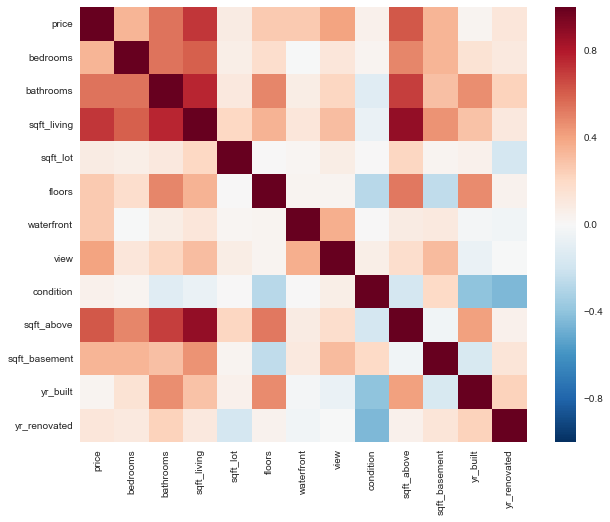

In [63]:
plt.figure(figsize=(10,8))
#calculate correlations between each columns
corr = df_data.corr()
#use seaborn to draw the headmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values, #x label
            yticklabels=corr.columns.values) #y label
plt.show()

Correlation gives an indication of how related the changes are between two variables. If two variables change in the same direction they are positively correlated. If the change in opposite directions together (one goes up, one goes down), then they are negatively correlated. From correlation matrix, positive correlations are displayed in red and negative correlations in blue color. The most correlated variable with price is sqft_living. 

Checking what the price distribution is

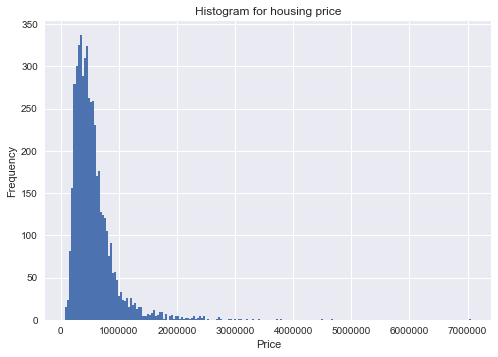

In [64]:
#Generate a new histogram with a larger number of bins.
price_plot=df_data['price'].hist(bins=200)
price_plot.set_title("Histogram for housing price")
price_plot.set_xlabel("Price")
price_plot.set_ylabel("Frequency")
plt.show()

Plotting Q-Q plot

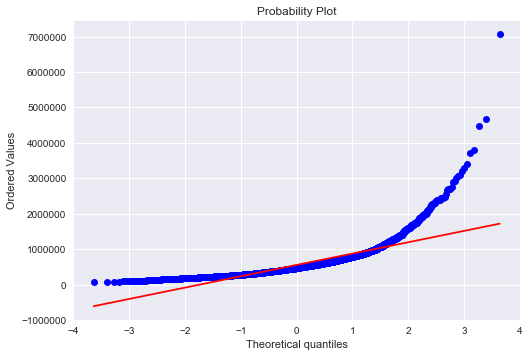

In [65]:
stats.probplot(df_data['price'], dist="norm", plot=pylab)
pylab.show()

In order to make the distribution smoother, I use bin=200 and find the distribution of price is in right skewd. For proving whether it is a normal distribution, I plot q-q plot. Q-Q plot is a plot where the axes are purposely transformed in order to make a normal distribution appear in a straight line. But according to the graph above, the blue scatters does not follow a line with slope = 1 and intercept = 0. It indicates that the price dirstribution is not a normal distribution.

Now let's test sqft_living - the most correlated variable to price

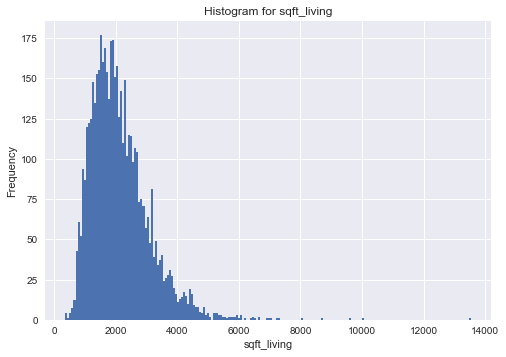

In [66]:
living_plot=df_data['sqft_living'].hist(bins=200)
living_plot.set_title("Histogram for sqft_living")
living_plot.set_xlabel("sqft_living")
living_plot.set_ylabel("Frequency")
plt.show()

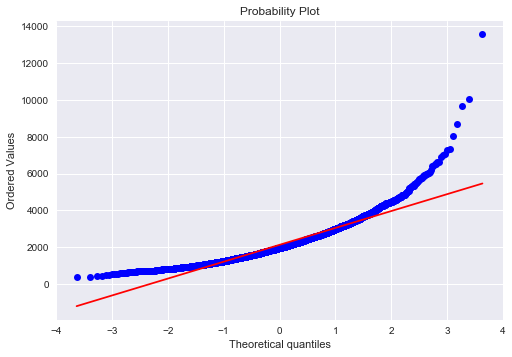

In [67]:
stats.probplot(df_data['sqft_living'], dist="norm", plot=pylab)
pylab.show()

From QQ plot, it shows that the sqft_living is skewed as well because the blue scatters do not match the red line. sqft_living are influenced by sqft_lot, sqft_above and sqft_basement, their distribution must be similar with sqft_living - which are skewed as well.

In order to investigate what a histogram looks like after dropping the outliers. I drop the price outliers:

In [68]:
#make a copy in case of changing the original dataframe
df_drop_outliers=df_data.copy()
#find the index which price is lower than 2000000
select_row=df_drop_outliers[df_drop_outliers['price'] >=2000000]
select_row.head()
#finding the index of rows
find_index=select_row.index.values
#change array to list
delet_index=find_index.tolist()
#drop rows and pass it a Series of index labels:
new_df=df_drop_outliers.drop(df_drop_outliers.index[delet_index])
#new_df

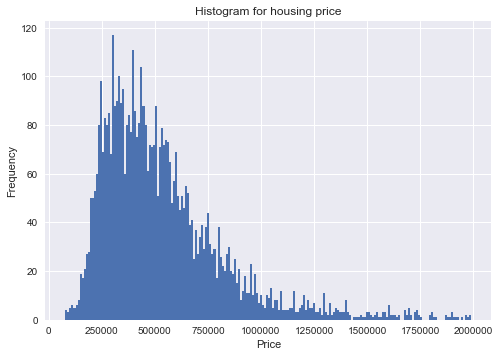

In [69]:
price_plot=new_df['price'].hist(bins=200)
price_plot.set_title("Histogram for housing price")
price_plot.set_xlabel("Price")
price_plot.set_ylabel("Frequency")
plt.show()

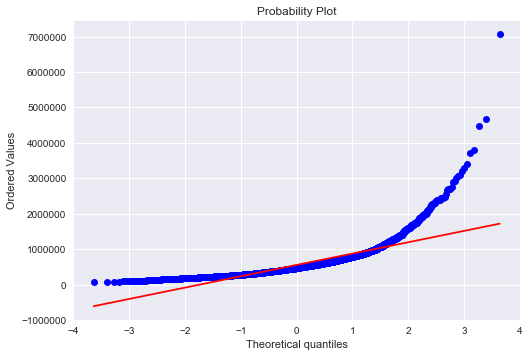

In [70]:
stats.probplot(df_drop_outliers['price'], dist="norm", plot=pylab)
pylab.show()

We can generally say that the price is a skewed distribution even we dropping the outliers. The outlier affects both results and assumptions. In this situation, it is not legitimate to simply drop the outlier, we should try a transformation if we want to handle and use them.

## 5.1. Z-Score Normalisation (standardisation): 

Let's standardise the values of price, sqft_living, sqft_lot, sqft_above and sqft_basement because other variables are categorical and discrete. Appending the standard variables to the DataFrame "df":

In [71]:
std_scale = preprocessing.StandardScaler().fit(df_data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])
df_std = std_scale.transform(df_data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])
df_std[0:5]

array([[-0.65183351, -0.82713527, -0.19376014, -0.56232861, -0.67421432],
       [ 4.87011797,  1.57635138, -0.1613041 ,  1.80308547, -0.06987075],
       [-0.57451019, -0.21325773, -0.07868094,  0.12515627, -0.67421432],
       [-0.36653713, -0.1404248 , -0.19039475, -0.95850634,  1.48415558],
       [-0.01991536, -0.20285302, -0.11994974, -0.79537433,  1.0524816 ]])

adding data after normalizing and see the comparision

In [72]:
df_norm=df_data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]

In [73]:
#copy of a dataframe to make sure the initial DataFrame shouldn't change.
df_znorm=df_norm.copy()

In [74]:
#scale all of numeric variables
df_znorm['price_scaled'] = df_std[:,0] 
df_znorm['sqft_living_scaled'] = df_std[:,1] 
df_znorm['sqft_lot_scaled'] = df_std[:,2]
df_znorm['sqft_above_scaled'] = df_std[:,3]
df_znorm['sqft_basement_scaled'] = df_std[:,4]
df_znorm.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,price_scaled,sqft_living_scaled,sqft_lot_scaled,sqft_above_scaled,sqft_basement_scaled
0,313000,1340,7912,1340,0,-0.651834,-0.827135,-0.193760,-0.562329,-0.674214
1,2384000,3650,9050,3370,280,4.870118,1.576351,-0.161304,1.803085,-0.069871
2,342000,1930,11947,1930,0,-0.574510,-0.213258,-0.078681,0.125156,-0.674214
3,420000,2000,8030,1000,1000,-0.366537,-0.140425,-0.190395,-0.958506,1.484156
4,550000,1940,10500,1140,800,-0.019915,-0.202853,-0.119950,-0.795374,1.052482


print out values:

In [75]:
print('Mean after standardisation:\nprice = {:.2f}, sqft_living= {:.2f}, sqft_lot= {:.2f}, sqft_above= {:.2f}, sqft_basement= {:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,1].mean(), df_std[:,1].mean(), df_std[:,1].mean()))
print('\nStandard deviation after standardisation:\nprice = {:.2f}, sqft_living= {:.2f}, sqft_lot= {:.2f}, sqft_above= {:.2f}, sqft_basement= {:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,1].std(), df_std[:,1].std(), df_std[:,1].std()))

Mean after standardisation:
price = -0.00, sqft_living= 0.00, sqft_lot= 0.00, sqft_above= 0.00, sqft_basement= 0.00

Standard deviation after standardisation:
price = 1.00, sqft_living= 1.00, sqft_lot= 1.00, sqft_above= 1.00, sqft_basement= 1.00


We can see that after z-score normalization, the mean is 0 and standard devidation is 1. 
- The reason why mean is 0 is because that x-μ only change the mean，sd is not changed. 
- The reason why sd=1 is that (x-μ)/σ can only be a multiple of standard deviation.

Now, compute and display the normalised values for both features. Let's check if they have mean of 0 and SD= 1.

In [76]:
df_znorm.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,price_scaled,sqft_living_scaled,sqft_lot_scaled,sqft_above_scaled,sqft_basement_scaled
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,5.574692e+05,2134.962800,1.470577e+04,1822.590800,312.372000,-7.953638e-17,1.810996e-16,4.792278e-17,2.997602e-17,2.629119e-16
std,3.750861e+05,961.199862,3.506632e+04,858.286524,463.358951,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,7.800000e+04,370.000000,6.380000e+02,370.000000,0.000000,-1.278419e+00,-1.836392e+00,-4.012164e-01,-1.692600e+00,-6.742143e-01
25%,3.300000e+05,1460.000000,5.000750e+03,1190.000000,0.000000,-6.065061e-01,-7.022788e-01,-2.767897e-01,-7.371129e-01,-6.742143e-01
50%,4.700000e+05,1970.000000,7.680000e+03,1590.000000,0.000000,-2.332211e-01,-1.716389e-01,-2.003768e-01,-2.710215e-01,-6.742143e-01
75%,6.601250e+05,2620.000000,1.100000e+04,2300.000000,610.000000,2.737133e-01,5.046669e-01,-1.056896e-01,5.562909e-01,6.423913e-01
max,7.062500e+06,13540.000000,1.074218e+06,9410.000000,4820.000000,1.734450e+01,1.186660e+01,3.021755e+01,8.841066e+00,9.729129e+00


We can see that after standarise, the variables fluctuate around 0. The value larger than 0 means it higher than the mean level, and lower than 0 means it lower the mean level.

### Compare the variables before and after normalization
In order to investigate how the normalization actually affect the data, we can visualize the data by plotting the variable values.

Firstly, plot the original data of 'price'

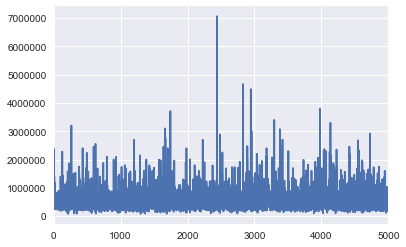

In [77]:
%matplotlib inline
df_znorm['price'].plot()
plt.show()

Plot price after z-score normalization

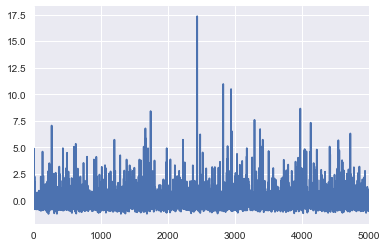

In [78]:
df_znorm['price_scaled'].plot()
plt.show()

It seems the plot have not been changed except the scale.

Comparing sqft_living before and after standardise

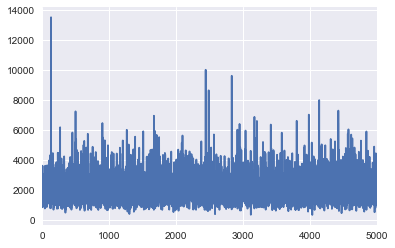

In [79]:
df_znorm["sqft_living"].plot()
plt.show()

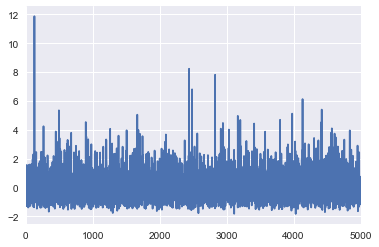

In [80]:
df_znorm["sqft_living_scaled"].plot()
plt.show()

It seems the sqft_living plot have not been changed except the scale.

##### From the chart above, we can see that:

Z scores consider both the mean value and the variability in a set of data. However, z-score assumes the distribution is a normal distribution. However, this case does not meet this assumption. The scores cannot be interpreted as a standard proportion of the distribution from which they were calculated. For example, the price is right skewd, the area with the standard deviation of 1 to the left of the mean is not equal to the area within the same distance to the right of the mean.

## 5.2 MinMax Normalization: 
Minmax normalization is a normalization strategy which linearly transforms x to y. It often known as feature scaling where the values of a numeric range of a feature of data, i.e. price, reduced to a scale between between 0 and 1. The  function is 
* y=(x-MinValue)/(MaxValue-MinValue) 
(x and y is the value before and after normalization, MaxValue and MinValue is maximum number and minimum number from samples).

Here is using scikit-learn to scale a toy data matrix to the [0, 1] range:

In [81]:
minmax_scale = preprocessing.MinMaxScaler().fit(df_data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])
df_minmax = minmax_scale.transform(df_data[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']])
df_minmax[0:5]

array([[ 0.03364593,  0.07365224,  0.00677546,  0.10730088,  0.        ],
       [ 0.33015964,  0.24905087,  0.00783547,  0.33185841,  0.05809129],
       [ 0.03779798,  0.11845103,  0.01053391,  0.17256637,  0.        ],
       [ 0.04896557,  0.12376614,  0.00688537,  0.06969027,  0.20746888],
       [ 0.06757821,  0.11921033,  0.00918609,  0.08517699,  0.1659751 ]])

Print the output

In [82]:
print('Min-value after min-max scaling:\nprice = {:.2f}, sqft_living = {:.2f}, sqft_lot = {:.2f}, sqft_above = {:.2f}, sqft_basement = {:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min(), df_minmax[:,4].min()))
print('\nMax-value after min-max scaling:\nprice = {:.2f}, sqft_living = {:.2f}, sqft_lot = {:.2f}, sqft_above = {:.2f}, sqft_basement = {:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max(), df_minmax[:,4].max()))

Min-value after min-max scaling:
price = 0.00, sqft_living = 0.00, sqft_lot = 0.00, sqft_above = 0.00, sqft_basement = 0.00

Max-value after min-max scaling:
price = 1.00, sqft_living = 1.00, sqft_lot = 1.00, sqft_above = 1.00, sqft_basement = 1.00


We can see that after minmax, min value is 0 and max is 1

### Plot the original, standardised and normalised data values. 

#### The plot below includes the price and sqft_living datapoints on all three different scales: 
* the input scale of price and sqft_living are in thousands unit (green)
* the standardized features (red)
* the normalized features (blue) 

Original VS standardised

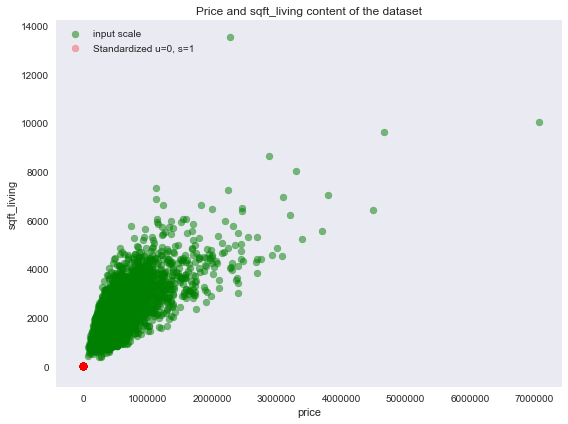

In [83]:
%matplotlib inline

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_data['price'], df_data['sqft_living'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3) 

    plt.title('Price and sqft_living content of the dataset')
    plt.xlabel('price')
    plt.ylabel('sqft_living')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

This is the original data(green) and z-score standardised data. We can see the orginal data is larger than standardised.

Original VS min-max

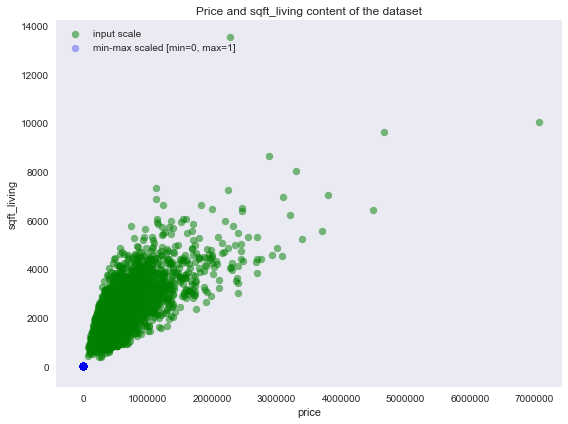

In [84]:
%matplotlib inline

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_data['price'], df_data['sqft_living'],
            color='green', label='input scale', alpha=0.5)
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)


    plt.title('Price and sqft_living content of the dataset')
    plt.xlabel('price')
    plt.ylabel('sqft_living')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

From the 2 plottings above, we can see the large scale difference between before and after normalization. After normalization, the model can not only find relation between 2 variables which having a large scale, but also guarantee stable convergence of weight and biases.

Standardize vs Min-max

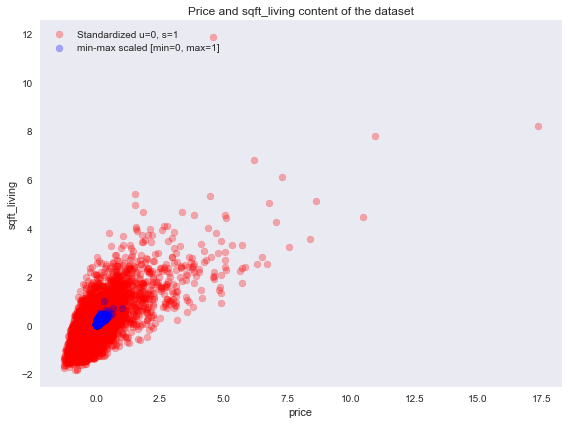

In [85]:
%matplotlib inline

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
             label='Standardized u=0, s=1', alpha=0.3) 
    
    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)


    plt.title('Price and sqft_living content of the dataset')
    plt.xlabel('price')
    plt.ylabel('sqft_living')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

From above graph, MinMax Scaling (in blue) transforms real data values such that the minimum and the maximum of the transformed data take certain values -- 0 and 1. And z-score (in red) linearly transforms the data in such a way, that the mean value of the transformed data equals 0 while their standard deviation equals 1. The transformed values themselves do not lie in a particular interval [0,1].

### Plotting the original, standardised and normalised data values based on city groups

#### Encoding categorical variable city to number.

I create a mapping dictionary that contains city column to process later as well as a dictionary of the values to translate. Here is the complete dictionary for cleaning up the city column

In [86]:
#list all of cities into list format
city_list=df_data.city.unique().tolist()
city={}
for num in range(len(city_list)):
    city[city_list[num]]=num

city={'city':city}    
city

{'city': {'Algona': 32,
  'Ames Lake': 70,
  'Auburn': 9,
  'Beaux Arts Village': 41,
  'Bellevue': 3,
  'Black Diamond': 29,
  'Bothell': 11,
  'Bryn Mawr-Skyway': 67,
  'Burien': 23,
  'Carnation': 19,
  'Cedar Falls': 66,
  'Cedar Grove': 62,
  'Clyde Hill': 31,
  'Cottage Lake': 57,
  'Covington': 21,
  'Des Moines': 10,
  'Duvall': 22,
  'East Hill-Meridian': 64,
  'East Renton Highlands': 50,
  'Enumclaw': 36,
  'Fairwood': 56,
  'Fall City': 17,
  'Federal Way': 12,
  'Georgetown': 68,
  'Highland Park': 53,
  'Hobart': 46,
  'Inglewood-Finn Hill': 24,
  'Issaquah': 14,
  'Kenmore': 25,
  'Kent': 2,
  'Kirkland': 13,
  'Klahanie': 48,
  'Krain': 52,
  'Lake Forest Park': 7,
  'Lake Morton-Berrydale': 65,
  'Lakeland North': 51,
  'Lakeland South': 55,
  'Lea Hill': 72,
  'Maple Heights-Lake Desire': 49,
  'Maple Valley': 5,
  'Medina': 38,
  'Mercer Island': 28,
  'Milton': 43,
  'Mirrormont': 59,
  'Mount View': 69,
  'Newcastle': 26,
  'Normandy Park': 16,
  'North Bend': 6,
 

In [87]:
#select city column as a dataframe
df_city=df_data[['city']]
#join 2 dataframes
df_znorm=pd.concat([df_znorm, df_city], axis=1)

To convert the columns to numbers using replace :

In [88]:
df_znorm.replace(city, inplace=True)

Convertion completed

In [89]:
#check the city column
df_znorm

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,price_scaled,sqft_living_scaled,sqft_lot_scaled,sqft_above_scaled,sqft_basement_scaled,city
0,313000,1340,7912,1340,0,-0.651834,-0.827135,-0.193760,-0.562329,-0.674214,0
1,2384000,3650,9050,3370,280,4.870118,1.576351,-0.161304,1.803085,-0.069871,1
2,342000,1930,11947,1930,0,-0.574510,-0.213258,-0.078681,0.125156,-0.674214,2
3,420000,2000,8030,1000,1000,-0.366537,-0.140425,-0.190395,-0.958506,1.484156,3
4,550000,1940,10500,1140,800,-0.019915,-0.202853,-0.119950,-0.795374,1.052482,4
5,490000,880,6380,880,0,-0.179895,-1.305752,-0.237453,-1.098334,-0.674214,1
6,335000,1350,2560,1350,0,-0.593174,-0.816731,-0.346401,-0.550676,-0.674214,4
7,482000,2710,35868,2710,0,-0.201225,0.598309,0.603552,1.034035,-0.674214,5
8,452500,2430,88426,1570,860,-0.279882,0.306977,2.102519,-0.294326,1.181984,6
9,640000,1520,6200,1520,0,0.220054,-0.639851,-0.242587,-0.352587,-0.674214,1


Plotting by dividing cities randomly into 3 groups.

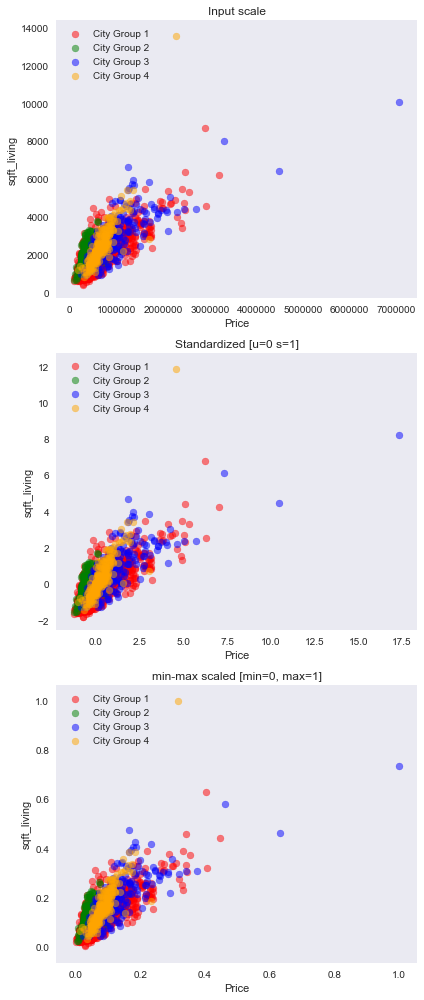

In [90]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df_znorm[['price', 'sqft_living']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [u=0 s=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,72), ('red','green','blue','orange')):
        ax[a].scatter(d[df_znorm['city'].values == i, 0],
                  d[df_znorm['city'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='City Group %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Price')
    ax[a].set_ylabel('sqft_living')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

We can see the ditribution has skewed with each group, which means outliers should be one of factors that influence the total distribution. In order to decrease the skew, we have to use another method - log transformation.

## 5.3 Log transformation:
The log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

In [91]:
df_norm['lprice'] = None
df_norm['lsqft_living']=None
df_norm['lsqft_lot']=None
df_norm['lsqft_above']=None

i = 0
for row in df_norm.iterrows():
    df_norm['lprice'].at[i] = math.log(df_norm["price"][i])
    df_norm['lsqft_living'].at[i] = math.log(df_norm["sqft_living"][i])
    df_norm['lsqft_lot'].at[i] = math.log(df_norm["sqft_lot"][i])
    df_norm['lsqft_above'].at[i] = math.log(df_norm["sqft_above"][i])
    i += 1

    
df_norm.head()

C:\Users\Qixuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Qixuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Qixuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lprice,lsqft_living,lsqft_lot,lsqft_above
0,313000,1340,7912,1340,0,12.654,7.20042,8.97614,7.20042
1,2384000,3650,9050,3370,280,14.6843,8.20248,9.11052,8.12267
2,342000,1930,11947,1930,0,12.7426,7.56528,9.38824,7.56528
3,420000,2000,8030,1000,1000,12.948,7.6009,8.99094,6.90776
4,550000,1940,10500,1140,800,13.2177,7.57044,9.25913,7.03878


In [92]:
df_norm['lsqft_basement']=None
temp_norm=[]
for each in df_norm.sqft_basement:
    #if column value is not equals to 0, then do the log transformation
    if each != 0:
        item=math.log(each)
        temp_norm.append(item)
    #else, directly append to list
    else:
        temp_norm.append(each)
df_norm['lsqft_basement']=temp_norm

C:\Users\Qixuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Qixuan\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [93]:
df_norm

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,lprice,lsqft_living,lsqft_lot,lsqft_above,lsqft_basement
0,313000,1340,7912,1340,0,12.654,7.20042,8.97614,7.20042,0.000000
1,2384000,3650,9050,3370,280,14.6843,8.20248,9.11052,8.12267,5.634790
2,342000,1930,11947,1930,0,12.7426,7.56528,9.38824,7.56528,0.000000
3,420000,2000,8030,1000,1000,12.948,7.6009,8.99094,6.90776,6.907755
4,550000,1940,10500,1140,800,13.2177,7.57044,9.25913,7.03878,6.684612
5,490000,880,6380,880,0,13.1022,6.77992,8.76092,6.77992,0.000000
6,335000,1350,2560,1350,0,12.7219,7.20786,7.84776,7.20786,0.000000
7,482000,2710,35868,2710,0,13.0857,7.9047,10.4876,7.9047,0.000000
8,452500,2430,88426,1570,860,13.0225,7.79565,11.3899,7.35883,6.756932
9,640000,1520,6200,1520,0,13.3692,7.32647,8.7323,7.32647,0.000000


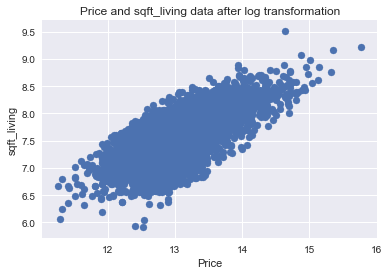

In [94]:
#plot between price and sqft_living
plt.scatter(df_norm.lprice, df_norm.lsqft_living)
plt.title('Price and sqft_living data after log transformation')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.show()

From the chart we can see the log transformation pulls in high numbers, it can reduce the impact of a single point when the outliers are independent variables which influenced by sqft_living etc variables.

Apparently, the best transformation method for this data is the log transformation as the data is positively skewed. we need to compress large values. That means we need to move down the ladder of powers to spread out data that is clustered at lower values. Therefore, logarithmic is the an appropriate transformation in this case. 


***

## Step 6: Writing into csv file

In order to ensure consistency, price, sqft_living, sqft_lot, sqft_above and sqft_basement are all in log transformation.

In [95]:
#make a copy
data=df_data.copy()
#write the value after transformation into new dataframe
data[['price']]=df_norm.lprice.tolist()
data[['sqft_living']]=df_norm.lsqft_living.tolist()
data[['sqft_lot']]=df_norm.lsqft_lot.tolist()
data[['sqft_above']]=df_norm.lsqft_above.tolist()
data[['sqft_basement']]=df_norm.lsqft_basement.tolist()

In [96]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,recorddate
0,20140502T000000,12.653958,3,1.50,7.200425,8.976136,1.5,0,0,3.0,7.200425,0.000000,1955,NaN,18810 Densmore Ave N,Shoreline,WA 98133,USA,NaT
1,20140502T000000,14.684290,5,2.50,8.202482,9.110520,2.0,0,4,5.0,8.122668,5.634790,1921,NaN,709 W Blaine St,Seattle,WA 98119,USA,NaT
2,20140502T000000,12.742566,3,2.00,7.565275,9.388235,1.0,0,0,4.0,7.565275,0.000000,1966,NaN,26206-26214 143rd Ave SE,Kent,WA 98042,USA,NaT
3,20140502T000000,12.948010,3,2.25,7.600902,8.990940,1.0,0,0,4.0,6.907755,6.907755,1963,NaN,857 170th Pl NE,Bellevue,WA 98008,USA,NaT
4,20140502T000000,13.217674,4,2.50,7.570443,9.259131,1.0,0,0,4.0,7.038784,6.684612,1976,NaN,9105 170th Ave NE,Redmond,WA 98052,USA,NaT


Checking datatype to ensure the data of price, sqft_living, sqft_lot, sqft_above and sqft_basement are all in float format

In [97]:
#check datatype
data.dtypes

date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition               float64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
street                   object
city                     object
statezip                 object
country                  object
recorddate       datetime64[ns]
dtype: object

Write into a file

In [98]:
#writing into a csv file
data.to_csv('output_data.csv', encoding='utf-8',index=False)

***

## Step 7: Visualizing property data based on price on the map

I would like to know which city has a higher housing price. I plot a map. Due to lack of shapefile, the map does not look perfectly after integration, but the good thing is that we can still figure out what cities has relative higher housing price and what cities having relative lower.

Counting housing price mean for each city

In [99]:
house_price=df_data.groupby('city')['price'].mean()

Google and finding corresponding latitude and longitude for each city.

In [100]:
position_list=[(43.07, -94.233),(47.6329, -121.9662),(32.6099, -85.4808),(47.5853, -122.2013),(47.6101, -122.2015), (47.3114, -122.0053),(47.761, -122.2056),(47.4924, -122.2391), (47.4668, -122.3405),(47.6479, -121.914),(42.5349, -92.4453), (40.8518, -74.229),(47.6318, -122.2179),(47.7443, -122.0773), (47.359558, -122.118011),(41.6005, -93.6091), (47.7423, -121.9857),(47.413, -122.1715),(47.4848, -122.1123),(47.2043, -121.9915),(47.4431, -122.1624), (47.5673, -121.8887),(47.3223, -122.3126),(38.690113, -75.385475),(42.1817, -87.8003),(41.52914, -87.250328),(47.7141, -122.2403),(47.5301, -122.0326), (42.96589, -78.87004), (39.271381, -76.131996), (47.6769, -122.206), (47.5707, -122.0073), (47.2429, -121.9893), (47.7539, -122.2776), (47.3265, -122.0999), (47.3292, -122.282), (47.2734, -122.2865), (47.3262, -122.1815),
 (47.4522, -122.0985), (47.3733, -122.0369), (41.1432, -81.8552), (47.5707, -122.2221), (42.2495, -71.0662),(47.4623, -121.9957), (37.3861, -122.0839),(41.0036719, -80.34700900000001),(47.4362, -122.3407), (47.4957, -121.7868),(41.837, -80.9555),(47.73204422, 47.73204422),(32.802353, -117.241676),(42.050284, -90.396028),(47.3523, -121.9837),(47.674, -122.1215),(47.4829, -122.2171),(47.634822, -122.055399),(47.6163, -122.0356),(47.4436, -122.2961),(47.6062, -122.3321),(47.756, -122.3457),(47.7093, -121.3601),(47.5287, -121.8254),(47.541721, -121.837702), (47.3923, -121.4001),(36.640968, -80.26561),(34.7315, -86.9706), (47.474, -122.261),(47.6798, -122.0169),(47.4473, -122.4599),(40.7978, -85.8205),(47.5086, -122.3551),(47.7543, -122.1635), (47.6462, -122.2173)]

Create a dataframe which contains city, average housing price and its latitude and longitude

In [101]:
house=pd.DataFrame({'city':house_price.index, 'mean_price':house_price.values, 'pos':position_list})

Now plotting a map, the size correlates to the price of houses in that area. The higher the price, the larger the cycle size.

C:\Users\Qixuan\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
C:\Users\Qixuan\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\Qixuan\Anaconda2\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


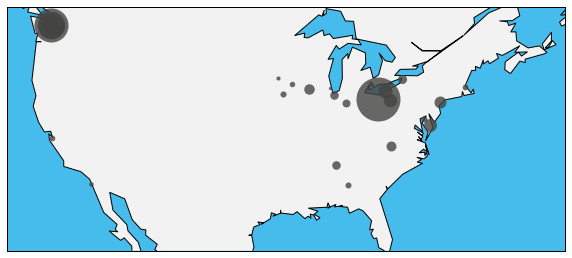

In [102]:
fig, ax = plt.subplots(figsize=(10,20))
# The ‘lat_0’ and ‘lon_0’ are the latitude and longitude of the centre point of USA
#‘llcrnr’ stands for ‘lower left corner’ and ‘urcrnr’ stands for upper right corner. 
m = Basemap(resolution='c', 
            projection='merc',
            lat_0=37.35, lon_0=-186.36, #the latitude and longitude of the centre point of map
            llcrnrlon=-127.62, llcrnrlat=25.56, urcrnrlon=-58.71, urcrnrlat=49.15)
# drawmapboundary() function is used to set the colour of the seas and oceans 
m.drawmapboundary(fill_color='#46bcec')
#The fillcontinents() function is the colour of land masses
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
#drawcoastlines() function draws lines around the land masses
m.drawcoastlines()

#I did not find suitable USA city shapefile, but maybe can use the shapefile from our tutorial week10
#m.readshapefile('gz_2010_us_040_00_500k', 'areas')

#take a position and then plots the housing price associated with that position onto map represented by the size of the point
def plot_area(pos):
    count = house.loc[house.pos == pos]['mean_price']
    x, y = m(pos[1], pos[0])
    size = count/50000
    m.plot(x, y, 'o', markersize=size, color='#444442', alpha=0.8)
    
house.pos.apply(plot_area)
m

The larger the brown spots in the map, the higher the housing price!

***

# Summary

From this project, I integrate data which are in csv and xml format, and then reshap the numeric variables after merging those data.

The step of processing is:
1. Loading data from a csv file and a xml file to Python dataframes
2. Resolve schema conflicts:
    * Price: 1. write 'k' and 'm' in decimal format; 2. unit conversion: square meter to square feet
    * Datatype transformation such as bathrooms, bedrooms, sqft_living, etc
    * Address : 1. split into street, city, statezip and country; 2. street name suffix and abbreviation convertion
    * Waterfront: change 'yes' to '1'
    * Missing values: Match missing values of xml file with the values of a csv file, such as for yr_renovated - change 0 to NAN etc.
3. Similarity checking: checking duplicates for both files -If 2 files are completely the same, it means that they are matching successfully and no more conflicts exsit.
4. Outer join 2 dataframes - avoid duplicates and simutanously add columns, but it is just available for 1 dataframe
5. Normalization and transformation analysis (z-score normalization, minmax normalization, log transformation) - log transformation is the best method for this task
6. Writing to a csv file
7. Visulizing housing price for each city into a map